In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

m, n = 10, 6
A = np.random.randn(m, n)
U, s, Vt = np.linalg.svd(A)

Sigma = np.zeros((m, n))
Sigma[:n, :n] = np.diag(s)
A_reconstructed = U @ Sigma @ Vt
error = np.linalg.norm(A - A_reconstructed, ord='fro')

print(f"Reconstruction Error (Frobenius Norm): {error:.2e}")

Reconstruction Error (Frobenius Norm): 7.72e-15


k values: [0 1 2 3 4 5 6]
Errors E(k): [np.float64(7.080558682162791), np.float64(5.4395641221674635), np.float64(3.950721590652471), np.float64(2.863629472914547), np.float64(2.1442274570728963), np.float64(1.4378450570587908), np.float64(7.71753812063122e-15)]


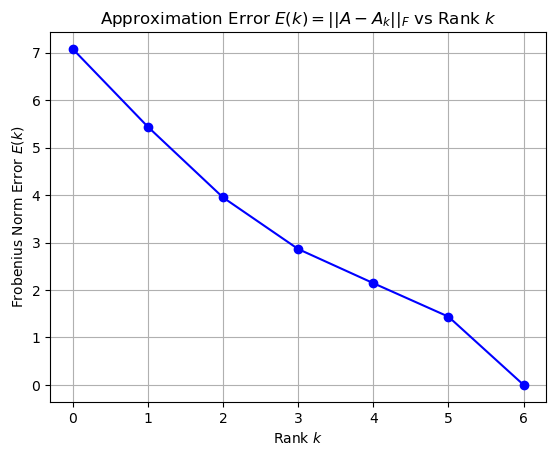

In [16]:
def rank_k_approx(U, s, Vt, k):
    Ak = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]
    return Ak

k_values = np.arange(0, n + 1)
errors = []

for k in k_values:
    Ak = rank_k_approx(U, s, Vt, k)
    error = np.linalg.norm(A - Ak, 'fro')
    errors.append(error)

# Print results
print(f"k values: {k_values}")
print(f"Errors E(k): {errors}")

# 4. Plot the approximation error E(k) vs k
plt.plot(k_values, errors, marker='o', linestyle='-', color='b')
plt.title('Approximation Error $E(k) = ||A - A_k||_F$ vs Rank $k$')
plt.xlabel('Rank $k$')
plt.ylabel('Frobenius Norm Error $E(k)$')
plt.grid(True)

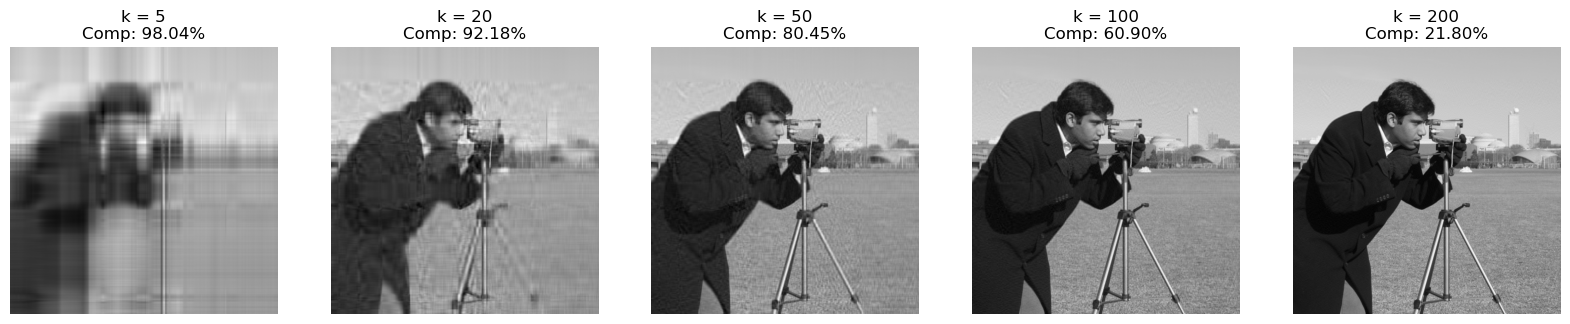

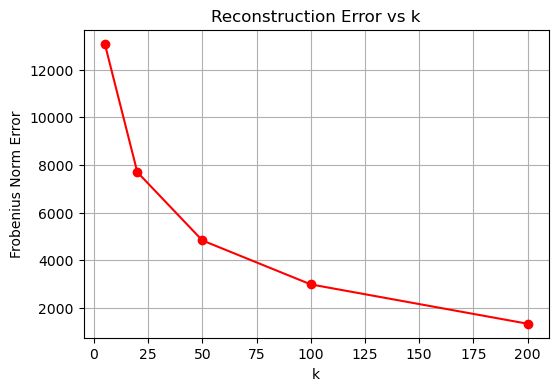

In [17]:
import skimage.data

X = skimage.data.camera().astype(float)
m, n = X.shape

U, s, Vt = np.linalg.svd(X, full_matrices=False)

ks = [5, 20, 50, 100, 200]

fig, axes = plt.subplots(1, len(ks), figsize=(20, 5))
errors = []
compressions = []

for i, k in enumerate(ks):
    Xk = (U[:, :k] * s[:k]) @ Vt[:k, :]
    
    c_k = 1 - (k * (m + n + 1)) / (m * n)
    compressions.append(c_k)
    
    err = np.linalg.norm(X - Xk, 'fro')
    errors.append(err)
    
    axes[i].imshow(Xk, cmap='gray')
    axes[i].set_title(f"k = {k}\nComp: {c_k:.2%}")
    axes[i].axis('off')

plt.show()

plt.figure(figsize=(6, 4))
plt.plot(ks, errors, 'r-o')
plt.title("Reconstruction Error vs k")
plt.xlabel("k")
plt.ylabel("Frobenius Norm Error")
plt.grid(True)
plt.show()

Shape of the data: (42000, 785)
Shape of X: (42000, 784), Shape of Y:(42000,).


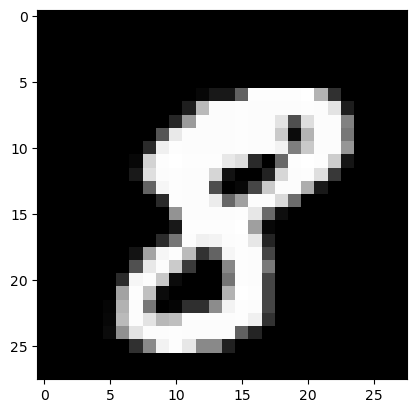

The associated digit is: 8.0


In [30]:
from mpl_toolkits.mplot3d import Axes3D

try:
    data = np.genfromtxt("MNIST.csv", delimiter=",")[1:]
except OSError:
    print("Error: 'MNIST.csv' not found. Please ensure the file is in the correct path.")

print(f"Shape of the data: {data.shape}")

# Split data into a matrix X and a vector Y
Y = data[:, 0]   # The first column is the label
X = data[:, 1:]  # The rest are pixels

print(f"Shape of X: {X.shape}, Shape of Y:{Y.shape}.")

def visualize(X, idx):
    # Visualize the image of index 'idx' from the dataset 'X'
    if idx >= len(X): return
    img = X[idx]
    img = np.reshape(img, (28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

# Visualize image number 10 and the corresponding digit.
idx = 10
visualize(X, idx)
print(f"The associated digit is: {Y[idx]}")




Final shape of X: (8423, 784). Final shape of Y: (8423,)


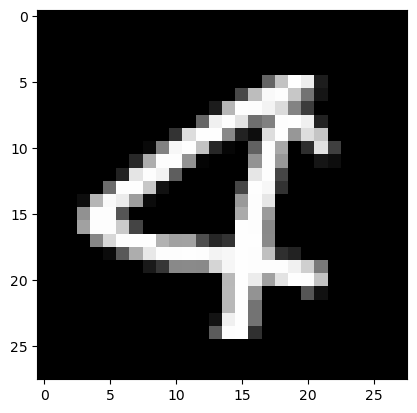

Train shape: (6738, 784), Test shape: (1685, 784)
Shape of c(X): (1, 784).
Shape of projected Train data: (6738, 2).


In [31]:
# Define the boolean array to filter out digits 3 and 4
filter_3or4 = (Y == 3) | (Y == 4)

# Define the filtered data
X_filtered = X[filter_3or4]
Y_filtered = Y[filter_3or4]

# Print final shape of data
print(f"Final shape of X: {X_filtered.shape}. Final shape of Y: {Y_filtered.shape}")

# Memorize the shape of X in the variables N and d
N, d = X_filtered.shape

# Visualize a sample just to prove that we only have 3 or 4
visualize(X_filtered, 10)

def split_data(X, Y, N_train):
    N, d = X.shape
    # Sample indices and shuffle them
    idx = np.arange(N)
    np.random.shuffle(idx)
    
    # Extract the set of index 
    train_idx = idx[:N_train]
    test_idx = idx[N_train:]  
    
    X_train = X[train_idx]
    Y_train = Y[train_idx]
    X_test = X[test_idx]
    Y_test = Y[test_idx]

    return (X_train, Y_train), (X_test, Y_test)

# Split
N_train = int(N * 0.8)
(X_train, Y_train), (X_test, Y_test) = split_data(X_filtered, Y_filtered, N_train)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Compute centroid
cX = np.mean(X_train, axis=0)

# Make it a row vector
cX = np.reshape(cX, (1, d))
print(f"Shape of c(X): {cX.shape}.")

# Center the data (row-by-row)
Xc = X_train - cX

# Compute SVD decomposition
# U: (N, N), s: (k,), VT: (k, d)
U, s, VT = np.linalg.svd(Xc, full_matrices=False)

# Given k, compute reduced SVD
k = 2
VTk = VT[:k]

# Define projection matrix
P = VTk

# Project X_train -> Z_train
Z_train = Xc @ P.T
print(f"Shape of projected Train data: {Z_train.shape}.")

Shape of projected Test data: (1685, 2).


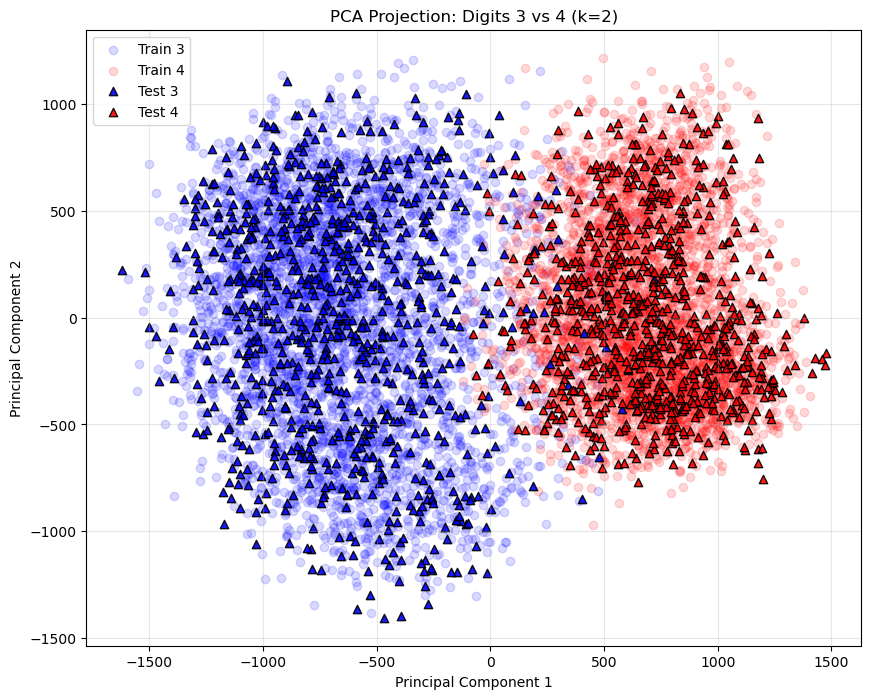

In [ ]:
# 1. Project Test Data
Xc_test = X_test - cX
Z_test = Xc_test @ P.T
print(f"Shape of projected Test data: {Z_test.shape}.")

# 2. Plotting (2D for k=2)
def plot_pca_results(Z_tr, Y_tr, Z_te, Y_te, d1, d2):
    plt.figure(figsize=(10, 8))
    
    # Define colors
    colors = {d1: 'blue', d2: 'red'}
    
    # Plot Training Data (dots)
    for digit in [d1, d2]:
        mask = Y_tr == digit
        plt.scatter(Z_tr[mask, 0], Z_tr[mask, 1], 
                    c=colors[digit], alpha=0.15, label=f'Train {digit}', marker='o')
        
    # Plot Test Data (triangles, darker)
    for digit in [d1, d2]:
        mask = Y_te == digit
        plt.scatter(Z_te[mask, 0], Z_te[mask, 1], 
                    c=colors[digit], alpha=0.9, label=f'Test {digit}', marker='^', edgecolor='k')

    plt.title(f"PCA Projection: Digits {d1} vs {d2} (k=2)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    
    # Handle duplicate labels in legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.grid(True, alpha=0.3)
    plt.show()

# Execute plot for 3 vs 4
plot_pca_results(Z_train, Y_train, Z_test, Y_test, 3, 4)




In [34]:

def run_custom_pca(X_raw, Y_raw, d1, d2, k=2, plot_3d=False):
    """
    Encapsulates the pipeline to repeat for different digits or k values.
    """
    print(f"\n--- Running PCA for {d1} vs {d2} with k={k} ---")
    
    # 1. Filter
    mask = (Y_raw == d1) | (Y_raw == d2)
    X_sub = X_raw[mask]
    Y_sub = Y_raw[mask]
    
    # 2. Split
    N_tr = int(len(X_sub) * 0.8)
    (X_tr, Y_tr), (X_te, Y_te) = split_data(X_sub, Y_sub, N_tr)
    
    # 3. Center
    mean_vec = np.mean(X_tr, axis=0).reshape(1, -1)
    X_tr_c = X_tr - mean_vec
    X_te_c = X_te - mean_vec
    
    # 4. SVD & Project
    U, s, Vt = np.linalg.svd(X_tr_c, full_matrices=False)
    P_matrix = Vt[:k] # Shape (k, d)
    
    Z_tr = X_tr_c @ P_matrix.T
    Z_te = X_te_c @ P_matrix.T
    
    # 5. Plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d') if plot_3d else fig.add_subplot(111)
    
    colors = {d1: 'blue', d2: 'red'}
    
    # Helper to plot specific subset
    def plot_points(Z, Y, dataset_name, marker, alpha, edge=None):
        for digit in [d1, d2]:
            m = Y == digit
            xs = Z[m, 0]
            ys = Z[m, 1]
            zs = Z[m, 2] if plot_3d else None
            
            lbl = f'{dataset_name} {digit}'
            
            if plot_3d:
                ax.scatter(xs, ys, zs, c=colors[digit], marker=marker, 
                           alpha=alpha, edgecolor=edge, label=lbl)
            else:
                ax.scatter(xs, ys, c=colors[digit], marker=marker, 
                           alpha=alpha, edgecolor=edge, label=lbl)

    plot_points(Z_tr, Y_tr, 'Train', 'o', 0.1, None)
    plot_points(Z_te, Y_te, 'Test', '^', 0.9, 'k')
    
    ax.set_title(f"PCA: {d1} vs {d2} (k={k})")
    
    # Clean legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())
    
    plt.show()


--- Running PCA for 3 vs 4 with k=2 ---


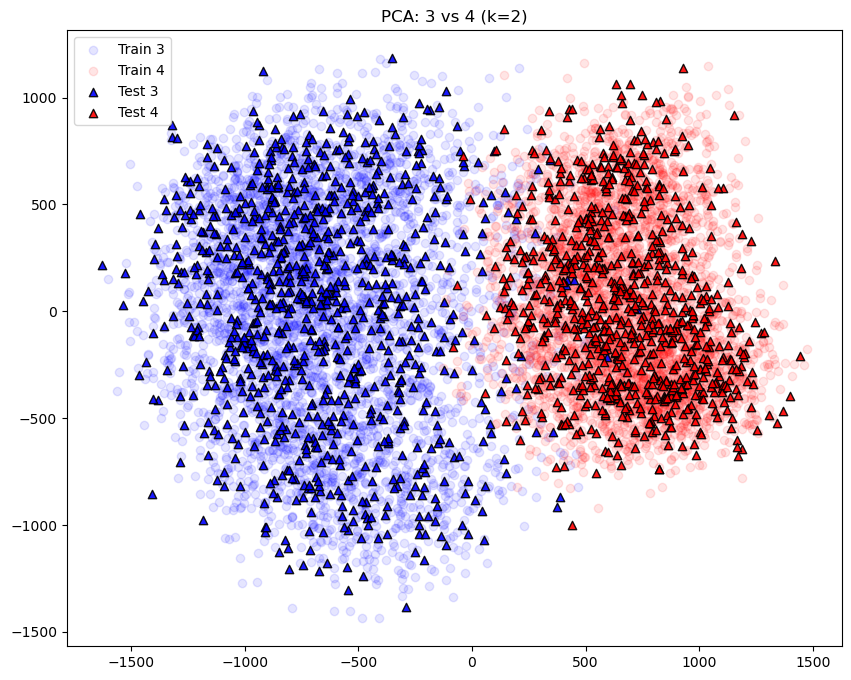


--- Running PCA for 1 vs 7 with k=2 ---


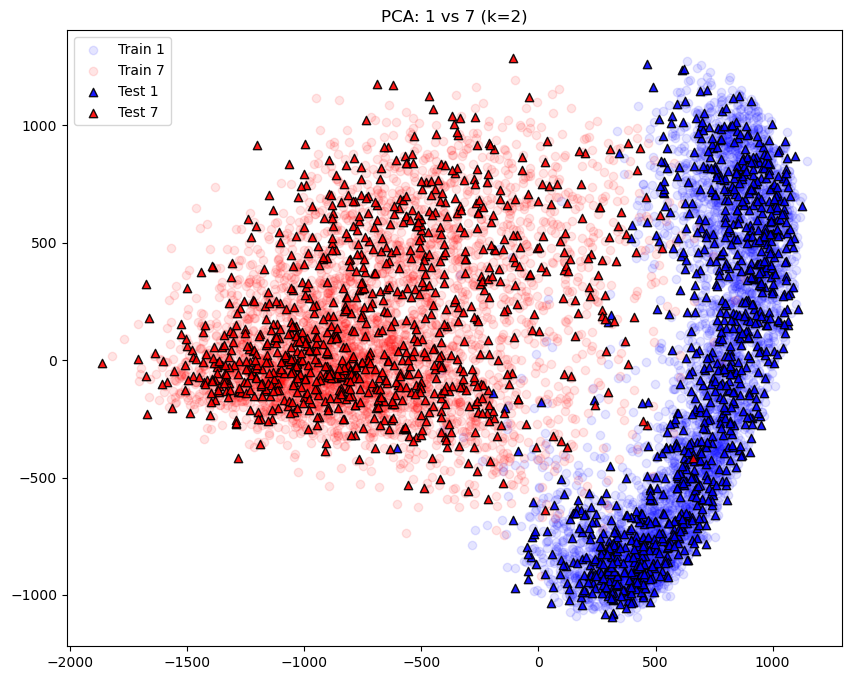


--- Running PCA for 5 vs 8 with k=2 ---


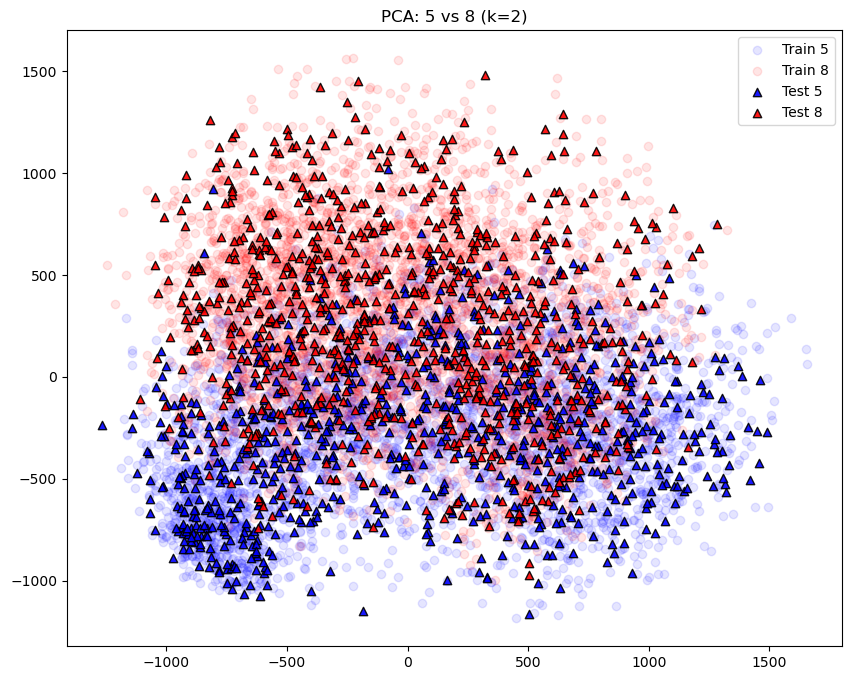


--- Running PCA for 3 vs 4 with k=3 ---


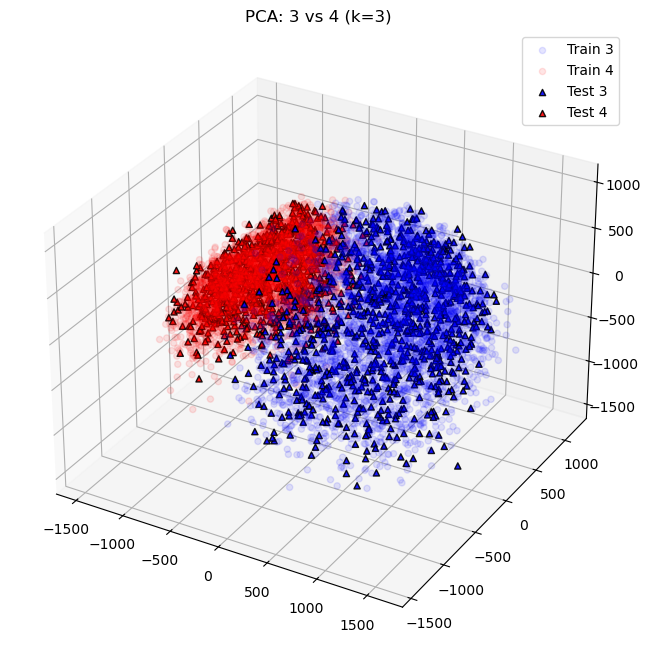

In [40]:
# 3 vs 4 (k=2)
run_custom_pca(X, Y, 3, 4, k=2, plot_3d=False)

# 1 vs 7 (k=2)
run_custom_pca(X, Y, 1, 7, k=2, plot_3d=False)

# 5 vs 8 (k=2)
run_custom_pca(X, Y, 5, 8, k=2, plot_3d=False)

# 3 vs 4 (k=3, 3D Plot)
run_custom_pca(X, Y, 3, 4, k=3, plot_3d=True)